# 逻辑回归 Logistic Regression

<img src="data/logo.png" alt="Drawing" style="width: 300px;"/>

在上一节中，我们看到线性回归可以很好的拟合出一条线或超平面来做出对连续变量的预测。
但在分类问题中我们期望得到对一组输入对应类别的概率，线性回归就不是非常适用了。

## 概述

<img src="data/logistic.jpg" alt="Drawing" style="width: 300px;"/>

$$
\hat{y} = \frac{1}{1 + e^{-XW}}
$$ 

*其中* :
* ~$\hat{y}~$ = 预测 | ~$\in \mathbb{R}^{NX1}~$ (~$N~$ 是样本个数)
* ~$X~$ = 输入 | ~$\in \mathbb{R}^{NXD}~$ (~$D~$ 是特征个数)
* ~$W~$ = weights | ~$\in \mathbb{R}^{DX1}~$ 


这是一个二项式逻辑回归。主要思想是用线性回归 (~$z=XW~$) 的输出作为一个 **sigmoid函数** ($\frac{1}{1+e^{-z}}$) 的输入, 从而将它映射到 (0, 1) 之间

但当我们有多个分类时，需要使用多项逻辑回归 (softmax 分类器) , 它使用线性方程 (~$z=XW~$) 并将它归一化，输出分类 ~$y~$ 的概率

$$
\hat{y} = \frac{e^{XW_y}}{\sum e^{XW}}
$$ 

*其中* :
* ~$\hat{y}~$ = 预测值 | ~$\in \mathbb{R}^{NX1}~$ (~$N~$ 样本数量)
* ~$X~$ = 输入 | ~$\in \mathbb{R}^{NXD}~$ (~$D~$ 特征数量)
* ~$W~$ = 权重 | ~$\in \mathbb{R}^{DXC}~$ (~$C~$ 类别数量)


* **目标:** 给定输入 ~$X~$, 预测它属于类别 ~$y~$ 的概率。Softmax 分类器会对线性输出做归一化，得到分类的概率。
* **优点:**
	* 可以给出和输入对应的分类概率
* **缺点:**
	* 因为使用 **交叉熵** 作为损失函数，模型对离群值很敏感。[**支持向量机(Support Verctor Machines)**]((https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f)) 是处理离群值很好的选择。
* **其它:**
	* 因为Softmax 分类器会输出分类概率，它在神经网结构中一般被用作最后一层。

## 训练
*步骤* :

1. 随机初始化模型权重 ~$W~$

2. 将输入值X传入模型并得到分对数(logits)(~$z=XW~$)。应用 Softmax, 得到经过独热编码后的分类概率 ~$\hat{y}~$ 。比如当有三个类别时，输出的分类概率可能是 [0.3, 0.3, 0.4].
3. 使用损失函数计算预测值 ~$\hat{y}~$ (比如 [0.3, 0.3, 0.4]) 和实际值 ~$y~$ (比如[0, 0, 1])的差，得到损失值 ~$J~$
常用的逻辑回归损失函数是交叉熵函数。
  * ~$J(\theta) = - \sum_i y_i ln (\hat{y_i}) =  - \sum_i y_i ln (\frac{e^{X_iW_y}}{\sum e^{X_iW}})~$
  * ~$y~$ = [0, 0, 1]
  * ~$\hat{y}~$ = [0.3, 0.3, 0.4]]
  * ~$J(\theta) = - \sum_i y_i ln (\hat{y_i}) =  - \sum_i y_i ln (\frac{e^{X_iW_y}}{\sum e^{X_iW}}) = - \sum_i [0 * ln(0.3) + 0 * ln(0.3) + 1 * ln(0.4)] = -ln(0.4)~$
  * 这可以把交叉熵简化: ~$J(\theta) = - ln(\hat{y_i})~$ (负的最大似然).
  * ~$J(\theta) = - ln(\hat{y_i}) = - ln (\frac{e^{X_iW_y}}{\sum_i e^{X_iW}})~$

4. 根据模型权重计算损失梯度 ~$J(\theta)~$, 假设各个类别是互斥的 (一种输入对应且仅对应一个输出类别)。
 * ~$\frac{\partial{J}}{\partial{W_j}} = \frac{\partial{J}}{\partial{y}}\frac{\partial{y}}{\partial{W_j}} = - \frac{1}{y}\frac{\partial{y}}{\partial{W_j}} = - \frac{1}{\frac{e^{W_yX}}{\sum e^{XW}}}\frac{\sum e^{XW}e^{W_yX}0 - e^{W_yX}e^{W_jX}X}{(\sum e^{XW})^2} = \frac{Xe^{W_j}X}{\sum e^{XW}} = XP~$
  * ~$\frac{\partial{J}}{\partial{W_y}} = \frac{\partial{J}}{\partial{y}}\frac{\partial{y}}{\partial{W_y}} = - \frac{1}{y}\frac{\partial{y}}{\partial{W_y}} = - \frac{1}{\frac{e^{W_yX}}{\sum e^{XW}}}\frac{\sum e^{XW}e^{W_yX}X - e^{W_yX}e^{W_yX}X}{(\sum e^{XW})^2} = \frac{1}{P}(XP - XP^2) = X(P-1)~$
5. 使用梯度下降做反向传播来更新模型权重。更新后的权重将会使得输出不正确的结果 ~$j~$ 的概率降低, 从而提高输出正确类别 ~$y~$的概率 
  * ~$W_i = W_i - \alpha\frac{\partial{J}}{\partial{W_i}}~$
6. 重复2 - 4步直到模型的表现最好.

## 数据
加载在学习 Pandas 中用到的titanic数据集

In [1]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib

In [2]:
# 设置参数
args = Namespace(
    seed=1234,
    data_file="data/titanic.csv",
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,
)

# 设置随机种子来保证结果可复现
np.random.seed(args.seed)

In [3]:
df = pd.read_csv(args.data_file, header=0)
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


# 使用 Scikit-learn 实现
**注意**: Scikit-learn 中 `LogisticRegression` 类使用的是 **坐标下降法(coordinate descent)** 进行拟合。我们依旧会使用 `SGDClassifier` 做随机梯度下降。

In [4]:
# 引入的必要包
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# 预处理
def preprocess(df):
  
    # 去掉有NaN值的行
    df = df.dropna()

    # 去掉含有文本的列(我们将在以后学习如何处理他们)
    features_to_drop = ["name", "cabin", "ticket"]
    df = df.drop(features_to_drop, axis=1)

    # pclass, sex 和 embarked 是类别变量
    categorical_features = ["pclass","embarked","sex"]
    df = pd.get_dummies(df, columns=categorical_features)

    return df

In [6]:
# 进行预处理
df = preprocess(df)
df.head()

,age,sibsp,parch,fare,survived,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,29.0000,0,0,211.3375,1,1,0,0,0,0,1,1,0
1,0.9167,1,2,151.5500,1,1,0,0,0,0,1,0,1
2,2.0000,1,2,151.5500,0,1,0,0,0,0,1,1,0
3,30.0000,1,2,151.5500,0,1,0,0,0,0,1,0,1
4,25.0000,1,2,151.5500,0,1,0,0,0,0,1,1,0


In [7]:
# 拆分训练集和测试集
mask = np.random.rand(len(df)) < args.train_size
train_df = df[mask]
test_df = df[~mask]
print ("Train size: {0}, test size: {1}".format(len(train_df), len(test_df)))

Train size: 199, test size: 71


**注意:** 如果要做类似标准化的预处理步骤，你需要在划分完训练集和测试集之后再使用他们。因为我们不太可能从测试集中得到任何有效信息。

In [8]:
# 分离 x 和 y
X_train = train_df.drop(["survived"], axis=1)
y_train = train_df["survived"]
X_test = test_df.drop(["survived"], axis=1)
y_test = test_df["survived"]

In [9]:
# 标准化训练数据 (mean=0, std=1)
X_scaler = StandardScaler().fit(X_train)

# 标准化训练和测试数据  (不要标准化分类y)
standardized_X_train = X_scaler.transform(X_train)
standardized_X_test = X_scaler.transform(X_test)

print ("mean:", np.mean(standardized_X_train, axis=0)) # mean should be ~0
print ("std:", np.std(standardized_X_train, axis=0))   # std should be 1

mean: [-1.78528326e-17  7.14113302e-17 -5.80217058e-17 -5.35584977e-17
  3.57056651e-17 -8.92641628e-17  3.57056651e-17 -3.79372692e-17
  0.00000000e+00  3.79372692e-17  1.04885391e-16 -6.69481221e-17]
std: [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [10]:
# 初始化模型
log_reg = SGDClassifier(loss="log", penalty="none", max_iter=args.num_epochs, 
                        random_state=args.seed)

In [11]:
# 训练
log_reg.fit(X=standardized_X_train, y=y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
# 概率
pred_test = log_reg.predict_proba(standardized_X_test)
print (pred_test[:5])

[[0.60319594 0.39680406]
 [0.00374908 0.99625092]
 [0.81886302 0.18113698]
 [0.01082253 0.98917747]
 [0.93508814 0.06491186]]


In [13]:
# 预测 (未标准化)
pred_train = log_reg.predict(standardized_X_train) 
pred_test = log_reg.predict(standardized_X_test)
print (pred_test)

[0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


## 模型评估指标

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
# 正确率
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_acc, test_acc))

train acc: 0.77, test acc: 0.82


到现在为止我们用的是`正确率`作为评价指标来评定模型的性能表现，但其实还有很多的其它的指标来评价模型。

<img src="data/metrics.jpg" alt="Drawing" style="width: 300px;"/>

评价指标的选择一定需要和实际情况结合。

使用 `positive - true`, `1`, `tumor`, `issue` 和 `negative - false`, `0`, `not tumor`, `not issue` 等等。

~$\text{accuracy} = \frac{TP+TN}{TP+TN+FP+FN}~$ 

~$\text{recall} = \frac{TP}{TP+FN}~$ → (有多个正例被分为正例)

~$\text{precision} = \frac{TP}{TP+FP}~$ → (在所有预测为正例的样本下，有多少是对的)

~$F_1 = 2 * \frac{\text{precision }  *  \text{ recall}}{\text{precision } + \text{ recall}}~$

where: 
* TP: # 被判定为正样本，事实上也是正样本
* TN: # 被判定为负样本，但事实上是正样本
* FP: # 被判定为正样本，但事实上是负样本
* FN: # 被判定为负样本，事实上也是负样本

In [16]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# 绘制混淆矩阵
def plot_confusion_matrix(cm, classes):
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        32
           1       0.91      0.74      0.82        39

   micro avg       0.82      0.82      0.82        71
   macro avg       0.82      0.82      0.82        71
weighted avg       0.83      0.82      0.82        71



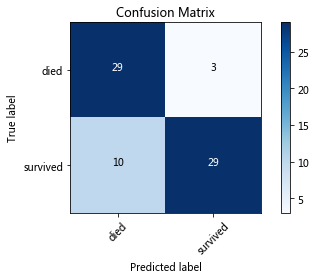

In [18]:
# 混淆矩阵
cm = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm=cm, classes=["died", "survived"])
print (classification_report(y_test, pred_test))

当存在大于两个标签（二分类）的时候，我们可以选择在微观/宏观层面计算评估指标，加权计算，等等方案。 更多内容可以查看 [scikit-learn 的官方文档](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)

## 推论
来看看你是否会在Titanic中存活下来

In [19]:
# 输入信息
X_infer = pd.DataFrame([{"name": "Goku Mohandas", "cabin": "E", "ticket": "E44", 
                         "pclass": 1, "age": 24, "sibsp": 1, "parch": 2, 
                         "fare": 100, "embarked": "C", "sex": "male"}])
X_infer.head()

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,ticket
0,24,E,C,100,Goku Mohandas,2,1,male,1,E44


In [20]:
# 预处理
X_infer = preprocess(X_infer)
X_infer.head()

,age,fare,parch,sibsp,pclass_1,embarked_C,sex_male
0,24,100,2,1,1,1,1


In [21]:
# 添加缺失值
missing_features = set(X_test.columns) - set(X_infer.columns)
for feature in missing_features:
    X_infer[feature] = 0

# 重新组织表头
X_infer = X_infer[X_train.columns]
X_infer.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,24,1,2,100,1,0,0,1,0,0,0,1


In [22]:
# 标准化
standardized_X_infer = X_scaler.transform(X_infer)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [23]:
# 预测
y_infer = log_reg.predict_proba(standardized_X_infer)
classes = {0: "died", 1: "survived"}
_class = np.argmax(y_infer)
print ("Looks like I would've {0} with about {1:.0f}% probability on the Titanic expedition!".format(
    classes[_class], y_infer[0][_class]*100.0))

Looks like I would've survived with about 57% probability on the Titanic expedition!


## Interpretability

那些特征值更能影响模型呢？

In [24]:
# 非标准化参数
coef = log_reg.coef_ / X_scaler.scale_
intercept = log_reg.intercept_ - np.sum((coef * X_scaler.mean_))
print (coef)
print (intercept)

[[-0.02155712  0.39758992  0.78341184 -0.0070509  -2.71953415  2.01530102
   3.50708962  0.11008796  0.         -0.11008796  2.94675085 -2.94675085]]
[5.10843738]


正系数表示与阳性类的相关性(1 = 存活)
负系数表示与阴性类的相关性(0 = 死亡)

In [25]:
indices = np.argsort(coef)
features = list(X_train.columns)
print ("Features correlated with death:", [features[i] for i in indices[0][:3]])
print ("Features correlated with survival:", [features[i] for i in indices[0][-3:]])

Features correlated with death: ['sex_male', 'pclass_1', 'embarked_S']
Features correlated with survival: ['pclass_2', 'sex_female', 'pclass_3']


### 非标准化系数的证明:

注意 ~$X~$ 和 ~$y~$ 都已经标准化了

~$\mathbb{E}[y] = W_0 + \sum_{j=1}^{k}W_jz_j~$

~$z_j = \frac{x_j - \bar{x}_j}{\sigma_j}~$

~$\hat{y} = \hat{W_0} + \sum_{j=1}^{k}\hat{W_j}z_j~$

~$\hat{y} = \hat{W_0} + \sum_{j=1}^{k} \hat{W}_j (\frac{x_j - \bar{x}_j}{\sigma_j})~$

~$\hat{y} = (\hat{W_0} - \sum_{j=1}^{k} \hat{W}_j\frac{\bar{x}_j}{\sigma_j}) +  \sum_{j=1}^{k} (\frac{\hat{w}_j}{\sigma_j})x_j~$

## K折交叉验证
交叉验证是一个重采样的模型评估方法。
我们用交叉验证来划分k(一般k=5或10)次不同的训练集和验证集，而不是最开始的1次。

*步骤* :

1. 打乱训练集 *train*。
2. 将训练集分为k个不同的子集。
3. 循环k次，每次选择 **一个子集来** 当作测试集，剩下作为训练集。
4. 重复这个过程，使每个子集都已经成为过训练集或者测试集的一部分。
5. 随机初始化权重，训练模型。
6. 在k个循环中，每次都重新初始化模型，注意保持相同的随机初始化权重，训练完后在测试集中进行验证。

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
# K折交叉验证
log_reg = SGDClassifier(loss="log", penalty="none", max_iter=args.num_epochs)
scores = cross_val_score(log_reg, standardized_X_train, y_train, cv=10, scoring="accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.66666667 0.7        0.7        0.4        0.7        0.7
 0.85       0.7        0.68421053 0.78947368]
Mean: 0.6890350877192982
Standard Deviation: 0.10984701440790533


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19.